In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
dir = 'C:\\Users\\Lenovo\\Downloads\\cell_images\\cell_images'

In [11]:
os.listdir(dir)

['test', 'train']

In [13]:
train_path = dir + '\\train\\'
test_path = dir + '\\test\\'

In [15]:
print("train path:", train_path)
print("test path:", test_path)

train path: C:\Users\Lenovo\Downloads\cell_images\cell_images\train\
test path: C:\Users\Lenovo\Downloads\cell_images\cell_images\test\


In [16]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [18]:
os.listdir(train_path + 'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [20]:
imread(train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png').shape

(148, 142, 3)

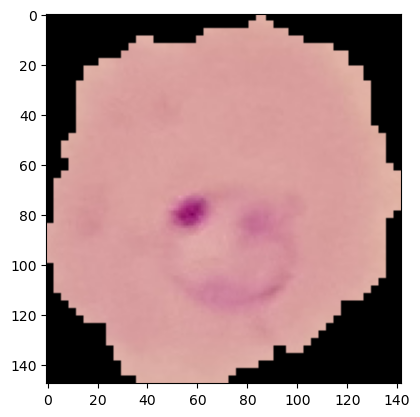

In [22]:
plt.imshow(imread(train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'))

In [24]:
os.listdir(train_path + 'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [25]:
imread(train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png').shape

(139, 160, 3)

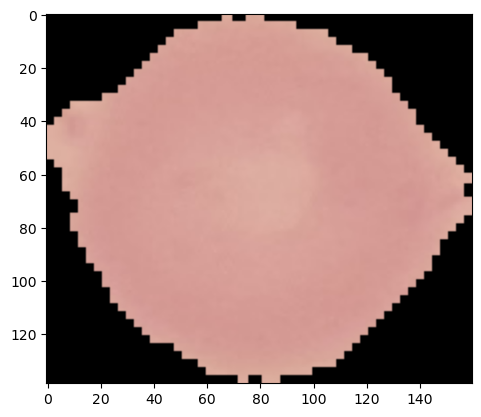

In [26]:
plt.imshow(imread(train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'))

In [28]:
len(os.listdir(train_path + 'parasitized'))

12480

In [29]:
len(os.listdir(train_path + 'uninfected'))

12480

In [31]:
len(os.listdir(test_path + 'parasitized'))

1300

In [32]:
len(os.listdir(test_path + 'uninfected'))

1300

In [34]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'uninfected'):
    
    img = imread(test_path + 'uninfected\\' + image_filename)
    d1, d2, num_channels = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [36]:
print([dim1[i]  for i in range(5)])
print([dim2[i] for i in range(5)])

[118, 172, 130, 163, 172]
[118, 145, 151, 145, 139]


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


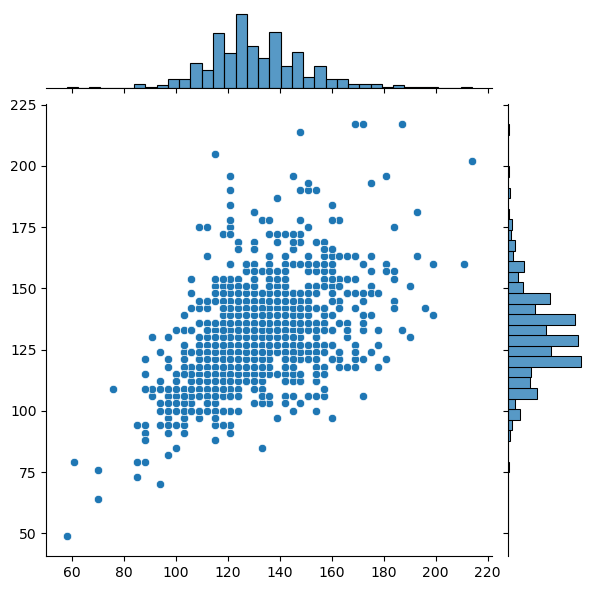

In [37]:
sns.jointplot(dim1, dim2)

In [38]:
print(np.mean(dim1))
print(np.mean(dim2))

130.92538461538462
130.75


In [39]:
image_shape = (130, 130, 3)

In [46]:
print(imread(train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png').max())
print(imread(train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png').min())

0.9098039
0.0


In [48]:
image_generator = ImageDataGenerator(rotation_range=20,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

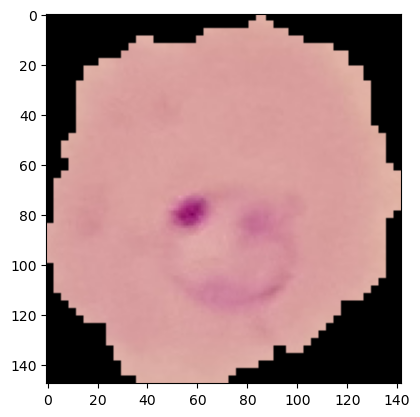

In [49]:
plt.imshow(imread(train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'))

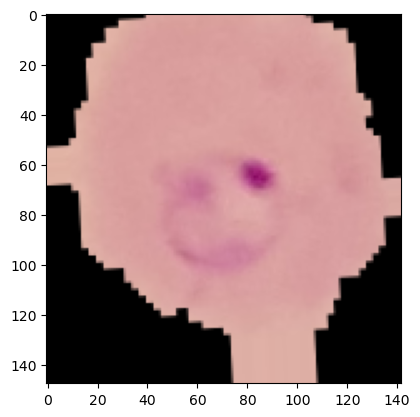

In [50]:
plt.imshow(image_generator.random_transform(
    imread(train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png')))

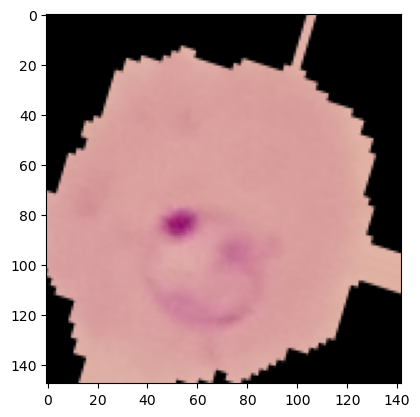

In [51]:
plt.imshow(image_generator.random_transform(
    imread(train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png')))

In [53]:
image_generator.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [54]:
image_generator.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [65]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(7,7), activation='relu', input_shape=image_shape),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=64, kernel_size=(5,5), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    
    Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    
    Flatten(),
    Dropout(0.2),
    
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')
    
])

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 124, 124, 32)      4736      
                                                                 
 batch_normalization_6 (Batc  (None, 124, 124, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 batch_normalization_7 (Batc  (None, 58, 58, 64)       256       
 hNormalization)                                                 
                                                      

In [68]:
batch_size = 16

In [69]:
train_image_generator = image_generator.flow_from_directory(train_path,
                                                            target_size=image_shape[:2],
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='binary')

Found 24958 images belonging to 2 classes.


In [70]:
test_image_generator = image_generator.flow_from_directory(test_path,
                                                            target_size=image_shape[:2],
                                                            color_mode='rgb',
                                                            batch_size=batch_size,
                                                            class_mode='binary',
                                                            shuffle=False)

Found 2600 images belonging to 2 classes.


In [71]:
model.fit(train_image_generator, validation_data=test_image_generator, epochs=15)

Epoch 1/15
1560/1560 [==============================] - 2364s 2s/step - loss: 0.4399 - val_loss: 0.3780
Epoch 2/15
1560/1560 [==============================] - 1874s 1s/step - loss: 0.2444 - val_loss: 0.2446
Epoch 3/15
1560/1560 [==============================] - 2016s 1s/step - loss: 0.2213 - val_loss: 0.1992
Epoch 4/15
1560/1560 [==============================] - 1871s 1s/step - loss: 0.2256 - val_loss: 0.2543
Epoch 5/15
1560/1560 [==============================] - 1833s 1s/step - loss: 0.2049 - val_loss: 0.2485
Epoch 6/15
1560/1560 [==============================] - 1846s 1s/step - loss: 0.2115 - val_loss: 0.1924
Epoch 7/15
1560/1560 [==============================] - 1823s 1s/step - loss: 0.2012 - val_loss: 0.2377
Epoch 8/15
1560/1560 [==============================] - 1908s 1s/step - loss: 0.2040 - val_loss: 0.1793
Epoch 9/15
1560/1560 [==============================] - 1824s 1s/step - loss: 0.1985 - val_loss: 0.4714
Epoch 10/15
1560/1560 [==============================] - 1840s 1

In [72]:
y_pred = model.predict(test_image_generator)

163/163 [==============================] - 50s 305ms/step


In [83]:
y_pred

array([[9.1077172e-04],
       [1.1047847e-02],
       [6.8239035e-07],
       ...,
       [9.7721684e-01],
       [9.8994976e-01],
       [8.8631159e-01]], dtype=float32)

In [84]:
y_pred = y_pred > 0.5

In [85]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [93]:
print(confusion_matrix(test_image_generator.classes, y_pred))
print('\n\n')
print(classification_report(test_image_generator.classes, y_pred, digits=3))

[[1230   70]
 [  80 1220]]



              precision    recall  f1-score   support

           0      0.939     0.946     0.943      1300
           1      0.946     0.938     0.942      1300

    accuracy                          0.942      2600
   macro avg      0.942     0.942     0.942      2600
weighted avg      0.942     0.942     0.942      2600



<AxesSubplot:>

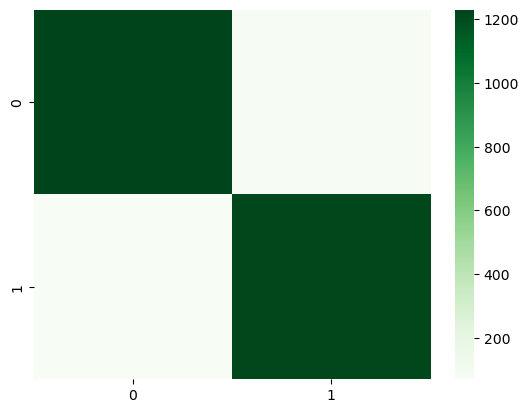

In [100]:
sns.heatmap(confusion_matrix(y_pred, test_image_generator.classes), cmap='Greens')

In [101]:
from tensorflow.keras.preprocessing import image

In [106]:
example = image.load_img(train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png',
                    target_size=image_shape)

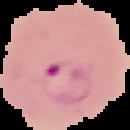

In [107]:
example

In [108]:
example = image.img_to_array(example)

In [109]:
example

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [111]:
example.shape

(130, 130, 3)

In [112]:
example = np.expand_dims(example, axis=0)

In [113]:
example.shape

(1, 130, 130, 3)

In [123]:
pred = model.predict(example)

1/1 [==============================] - 0s 46ms/step


In [125]:
['uninfected' if pred > 0.5 else 'parasitized']

['parasitized']

In [126]:
example = image.load_img(train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png',
                    target_size=image_shape)

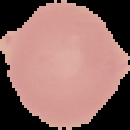

In [127]:
example

In [128]:
example = image.img_to_array(example)

In [129]:
example = np.expand_dims(example, axis=0)

In [130]:
pred = model.predict(example)

1/1 [==============================] - 0s 51ms/step


In [132]:
['uninfected' if pred > 0.5 else 'parasitized']

['uninfected']